In [6]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sympy import latex

In [3]:
def generate_data(n):
    """
    Generate n datapoints for 3 variables A, H, B
    with the model
    A -> H -> B
    """

    data = []
    for i in range(n):
        N_A = bernoulli.rvs(1./2)
        N_H = bernoulli.rvs(1./3)
        N_B = bernoulli.rvs(1./20)
        A = N_A
        H = (A + N_H) % 2
        B = (H + N_B) % 2
        data.append((A, H, B))
    return data

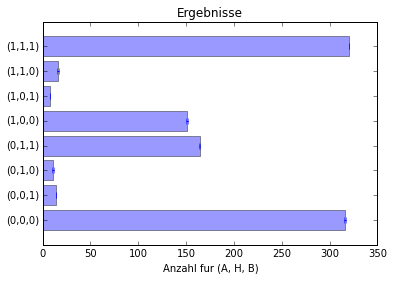

p(H=0|A=0) = 0.65
p(H=0|A=1) = 0.32
p(H=0|B=0) = 0.95
p(H=0|B=1) = 0.04


In [10]:
%matplotlib inline


data = generate_data(1000)

# Example data
people = ('(0,0,0)', '(0,0,1)', '(0,1,0)', '(0,1,1)', '(1,0,0)', '(1,0,1)', '(1,1,0)', '(1,1,1)')
get_bin = lambda x, n: x >= 0 and str(bin(x))[2:].zfill(n) or "-" + str(bin(x))[3:].zfill(n)
y_pos = np.arange(len(people))
# ('(0,0,0)', '(0,0,1)', '(0,1,0)', '(0,1,1)', '(1,0,0)', '(1,0,1)', '(1,1,0)', '(1,1,1)')
count = [sum([1 for d in data if map(int, list(get_bin(i, 3))) == list(d)]) for i in range(8)]

error = np.random.rand(len(people))

plt.barh(y_pos, count, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Anzahl fur (A, H, B)')
plt.title('Ergebnisse')

plt.show()

from sympy.interactive import printing
printing.init_printing(use_latex=True)
p_1 = (count[0] + count[1])  # h=0 and A=0
p_2 = (count[4] + count[5])  # h=0 and A=1
p_3 = (count[2] + count[3])  # h=1 and A=0
p_4 = (count[6] + count[7])  # h=1 and A=1
print(latex("p(H=0|A=0) = %0.2f" % (p_1/float(p_1+p_3))))
print(latex("p(H=0|A=1) = %0.2f" % (p_2/float(p_2+p_4))))

p_1 = (count[0] + count[4])  # h=0 and B=0
p_2 = (count[1] + count[5])  # h=0 and B=1
p_3 = (count[2] + count[6])  # h=1 and B=0
p_4 = (count[3] + count[7])  # h=1 and B=1
print(latex("p(H=0|B=0) = %0.2f" % (p_1/float(p_1+p_3))))
print(latex("p(H=0|B=1) = %0.2f" % (p_2/float(p_2+p_4))))